In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

Official Cifar dataset website is here: https://www.cs.toronto.edu/~kriz/cifar.html

In [8]:
EPOCHS = 10
BATCH_SIZE = 128

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train/255.0, x_test/255.0

170508288/170498071 [==============================] - 45s 0us/step


(50000, 32, 32, 3)


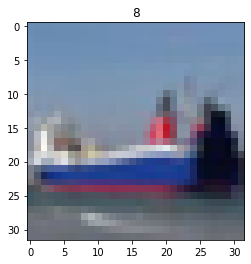

In [5]:
print(x_train.shape)
idx = 106
plt.imshow(x_train[idx])
plt.title(str(y_train[idx][0]))
plt.show()

In [6]:
model = keras.Sequential()
model.add(keras.layers.Input(x_train.shape[1:]))
model.add(keras.layers.Conv2D(filters=20, kernel_size=(3,3), strides=(2, 2), activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(filters=40, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(1e-3), 
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 20)        560       
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 20)       80        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 15, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 40)          7240      
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 40)         160       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 40)          0

2021-12-08 08:45:19.325088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 08:45:19.329766: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-12-08 08:45:19.329817: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2021-12-08 08:45:19.329908: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

$$
\begin{align}
y_{i0}\log p_0(x_{i}) + ... + y_{i9}\log p_9(x_{i})
\end{align}
$$

In [9]:
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)
model.evaluate(x_test, y_test)

Epoch 1/10
 11/391 [..............................] - ETA: 4s - loss: 1.1251 - accuracy: 0.5909

2021-12-08 08:47:15.176064: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


391/391 [==============================] - 5s 12ms/step - loss: 1.1345 - accuracy: 0.5993
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.0949 - accuracy: 0.6116
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 1.0626 - accuracy: 0.6237
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 1.0403 - accuracy: 0.6325
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 1.0224 - accuracy: 0.6399
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 1.0016 - accuracy: 0.6458
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 0.9856 - accuracy: 0.6518
Epoch 8/10
391/391 [==============================] - 5s 13ms/step - loss: 0.9712 - accuracy: 0.6586
Epoch 9/10
391/391 [==============================] - 5s 14ms/step - loss: 0.9615 - accuracy: 0.6603
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 1.0528 - accuracy: 0.6337


[1.0528452396392822, 0.6337000131607056]